In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [7]:
data = """4000	10000	15000	30000	50000	100000	1000000
1.12 s	2.78 s	4.58 s	9.43 s	18.4 s	24 s	238 s
10min 35s	24min 21s	38min 26s	69min 14s	0	0	0
16min 52s	29min 18s	46min 58s	95min 30s	0	0	0
01 min 00s	01 min 25s	02 min 10s	05 min 3s	13 min 42s	37 min 57s	270 min 00s
02 min 32s	05 min 51s	12 min 01s	15 min 28s	21 min 09s	45 min 00s	270 min 00s
00min 27s	01min 37s	02min 46s	07min 11s	0	0	0
1.331277h	5.65h	0h	0h	0h	0h	0
00min 4.33 s	00min 50.6 s	02min 48s	25min 27s	0	0	0"""

In [8]:
data_size, FA, ZIFA, ZINB, scVI, DCA, SIMLR, BISCUIT, MAGIC = data.split("\n")

In [9]:
data_size = [float(x)/1000. for x in str(data_size).split("\t")]
FA = [float(x[:-1]) / 60. for x in str(FA).split("\t")]
ZIFA = [float(x[:2]) + float(x[6:-1]) / 60. for x in str(ZIFA).split("\t")[:-3]]
ZINB = [float(x[:2]) + float(x[6:-1]) / 60. for x in str(ZINB).split("\t")[:-3]]
scVI = [float(x[:3]) + float(x[7:-1]) / 60. for x in str(scVI).split("\t")]
DCA = [float(x[:3]) + float(x[7:-1]) / 60. for x in str(DCA).split("\t")]
SIMLR = [float(x[:2]) + float(x[6:-1]) / 60. for x in str(SIMLR).split("\t")[:-3]]
BISCUIT = [float(x[:-1]) * 60 for x in str(BISCUIT).split("\t")[:-5]]
MAGIC = [float(x[:2]) + float(x[6:-1]) / 60. for x in str(MAGIC).split("\t")[:-3]]

In [10]:
from matplotlib import gridspec

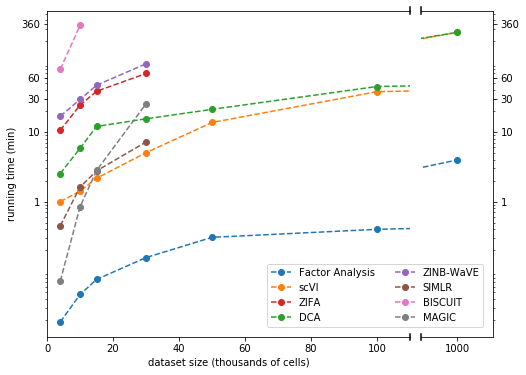

In [13]:
fig = plt.figure(figsize=[8.0, 6.0]) 
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1])
gs.update(wspace=0.05, hspace=0.05)

ax_left = plt.subplot(gs[0])
ax_right = plt.subplot(gs[1], sharey=ax_left)

for ax in [ax_left, ax_right]:
    fa,  = ax.plot(data_size, FA, label="Factor Analysis",marker='o', linestyle='--',)
    scvi, = ax.plot(data_size, scVI, label="scVI", marker='o', linestyle='--',)
    dca, = ax.plot(data_size, DCA, label="DCA", marker='o', linestyle='--',)
    zifa, = ax.plot(data_size[:4], ZIFA, label="ZIFA", marker='o', linestyle='--',)
    zinb, = ax.plot(data_size[:4], ZINB, label="ZINB-WaVE", marker='o', linestyle='--',)
    simlr, = ax.plot(data_size[:4], SIMLR, label="SIMLR", marker='o', linestyle='--',)
    biscuit, = ax.plot(data_size[:2], BISCUIT, label="BISCUIT", marker='o', linestyle='--',)
    magic, = ax.plot(data_size[:4], MAGIC, label="MAGIC", marker='o', linestyle='--',)
    
    
# zoom-in / limit the view to different portions of the data
ax_left.set_xlim(0, 110)  # outliers only
ax_right.set_xlim(900, 1100)  # most of the data

# hide the spines between ax and ax2
ax_left.spines['right'].set_visible(False)
ax_right.spines['left'].set_visible(False)
ax_left.yaxis.tick_left()
#ax_right.tick_params(label='off')  # don't put tick labels at the top
ax_right.yaxis.tick_right()

ax_left.set_xlabel('dataset size (thousands of cells)')
ax_left.set_ylabel('running time (min)')

ax_left.set_yscale('log')
ax_left.set_yticks([0.01, 1, 10, 30, 60, 360])
ax_right.set_xticks([1000])

ax_left.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax_left.transAxes, color='black', clip_on=False)
ax_left.plot((1,1),(-d,+d), **kwargs)
#t((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
ax_left.plot((1,1),(1-d,1+d), **kwargs)   # top-right diagonal

kwargs.update(transform=ax_right.transAxes)  # switch to the bottom axes
ax_right.plot((0,0),(1-d,1+d), **kwargs)   # bottom-left diagonal
ax_right.plot((0,0),(-d,+d), **kwargs) # bottom-right diagonal


ax_right.legend(handles=[fa, scvi, zifa, dca, zinb, simlr, biscuit, magic], ncol=2, bbox_to_anchor=(0., 0.0, 1., 0), loc=4, borderaxespad=1)
plt.show()
fig.savefig('time.pdf', dpi=300)